# Práctica 1
## Computer Vision


Se desea contruir un modelo de clasificación de utilizando Redes Neuronales Convolucionales y Tensorflow.


**Conjunto de Datos**

[Rock-Paper-Scissors Dataset](https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors?resource=download)

Contiene un total de 2,188 imágenes correspondientes a los gestos de la mano 'Piedra' (726 imágenes), 'Papel' (710 imágenes) y 'Tijeras' (752 imágenes) del juego Piedra Papel o Tijeras. Todas las imágenes se toman sobre un fondo verde con una iluminación y un balance de blancos relativamente consistentes.

Todas las imágenes son imágenes RGB de 300 píxeles de ancho por 200 píxeles de alto en formato .png. Las imágenes están separadas en tres subcarpetas denominadas 'piedra', 'papel' y 'tijeras' según su respectiva clase.


**Instrucciones**

1.- Cargue el conjunto de datos y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento de los datos. Aplique las transformaciones que considere necesarias a los datos con el objetivo de maximizar el accuracy. **(5pts)**

2.- Defina una arquitectura basada en redes neuronales convolucionales con el uso de Tensorflow. El diseño debe considerar un mínimo de 8 capas ocultas con al menos una capa convolucional, una capa pooling y una capa fully connected. **(5pts)**

3.- Entrene, optimice y evalúe de forma iterativa hasta hallar una arquitectura con resultados aceptables. Utilizando el modelo final, diagnostique si el modelo tiene problemas de sobreajuste, subajuste, ambas o ninguna. **(5pts)**

4.- Realice los cálculos necesarios para obtener la cantidad de paramétros devueltos por el método `.summary()` para su diseño de arquitectura así como las dimensiones del tensor en cada capa. Los cálculos realizados deben ser detallados. **(10pts)**

5.- Seleccione y aplique 5 técnicas de aumentación de datos y reentrene el modelo (independientemente del diagnóstico obtenido). Evalúe el nuevo desempeño tras aplicar estas técnicas y explique los resultados obtenidos (ya sea que se obtenga una mejora o una degradación en el rendimiento). **(5pts)**

6.- Cargue 10 imágenes no pertenecientes al conjuntos de datos original (descargadas de internet o fotografías de sus propias manos) y aplique el modelo para obtener su clasificación. Observe los resultados obtenidos y enliste al menos 3 conclusiones. **(5pts)**

## Equipo <10>

* Arredondo G Inda Jesús Antonio <<jesusarredondo0498@gmail.com>>
* Miranda Peñafiel Melissa Sofía <<mely.niiw@gmail.com>>
* Silva Rios Escarleth Marlenn <<escarleth.silva07@gmail.com>>

#### 1.- Cargue el conjunto de datos y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento de los datos. Aplique las transformaciones que considere necesarias a los datos con el objetivo de maximizar el accuracy. **(5pts)**

In [ ]:
# Importamos las librerias que vamos a utilizar
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import seaborn as sns
from matplotlib.image import imread
import pandas as pd

In [ ]:
# Vemos qué hay en el directorio
os.listdir()

['.config', 'sample_data']

In [ ]:
# Cargamos la conexión a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creamos el path
path= "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive"

In [ ]:
os.listdir(path)

['README_rpc-cv-images.txt',
 'rps-cv-images',
 'rock',
 'paper',
 'scissors',
 'Filtro_Laplaceano']

In [ ]:
path=path+"/rps-cv-images"

In [ ]:
os.listdir(path)

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

In [ ]:
### """Cargamos los directorios por carpeta"""
rock_path = os.path.join(path,'rock')
paper_path = os.path.join(path,'paper')
scissors_path = os.path.join(path,'scissors')

In [ ]:
# Vemos que funcione el path
rock_path

'/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive/rps-cv-images/rock'

### =======================================================================
### ====================== Analisis Exploratorio de Datos =======================
### =======================================================================

In [ ]:
""" Guardamos los elementos de cada carpeta en una variable """
rock_img = os.listdir(rock_path)
paper_img = os.listdir(paper_path)
scissors_img = os.listdir(scissors_path)

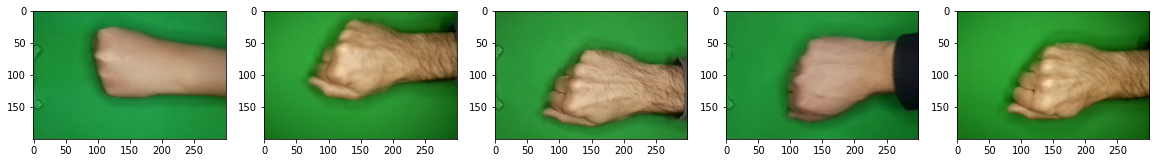

In [ ]:
""" Mostramos las primeras 5 imagenes de cada carpeta """
""" Rock """
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(rock_img[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(rock_path, img_path))
    plt.imshow(img)
plt.show()

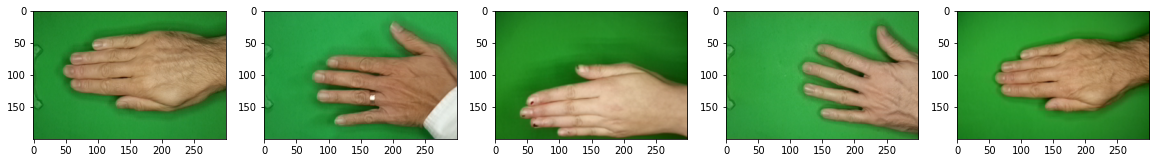

In [ ]:
"""Paper"""
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(paper_img[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(paper_path, img_path))
    plt.imshow(img)
plt.show()

In [ ]:
"""Scissor"""
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(scissors_img[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(scissors_path, img_path))
    plt.imshow(img)
plt.show()

Con lo anterior podemos notar que cada carpeta cuenta con distintas imagenes de piedra, papel o tijeras con un fondo verde.

In [ ]:
# Sacamos la cantidad de imágenes para cada categoría
paper=len(paper_img)
rock=len(rock_img)
scissors=len(scissors_img)

f"Cantidad de paper: {paper}, Cantidad de rock: {rock}, Cantidad de scissors: {scissors}"

'Cantidad de paper: 712, Cantidad de rock: 726, Cantidad de scissors: 768'

In [ ]:
# Verificamos las dimensiones de todas las imágenes en un directorio

def dimensiones(directorio):
  dim1 = []
  dim2 = []
  for image_filename in os.listdir(os.path.join(path, directorio)):
      img = imread(os.path.join(path, directorio, image_filename))
      d1, d2, colors = img.shape
      dim1.append(d1)
      dim2.append(d2)
  sns.jointplot(x=dim1, y=dim2)

In [ ]:
dimensiones("paper")

In [ ]:
# Imágenes de 200x300x3 capas de color
img.shape

(200, 300, 3)

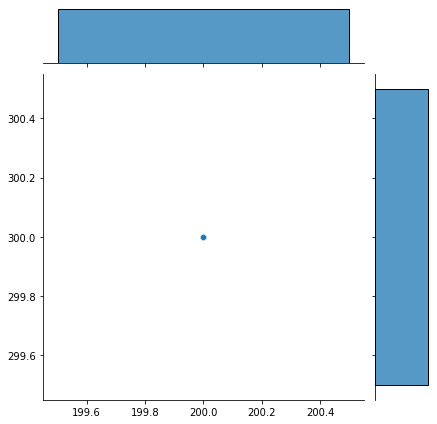

In [ ]:
dimensiones("rock")

In [ ]:
# Imágenes de 200x300x3 capas de color
img.shape

(200, 300, 3)

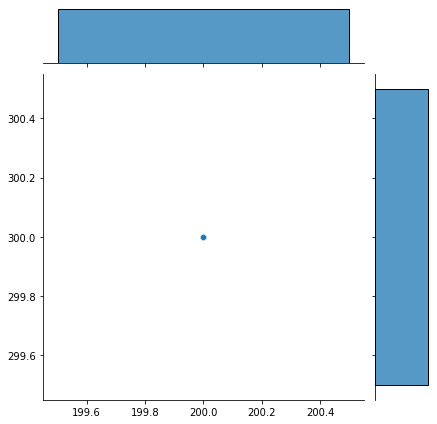

In [ ]:
dimensiones("scissors")

In [ ]:
# Imágenes de 200x300x3 capas de color
img.shape

(200, 300, 3)

In [ ]:
"""Por terminos de practicidad trabajaremos con imagenes de dimensiones cuadradas"""
image_shape = (200,200,3)

Analizando las imagenes podemos detectar que es de mayor importancia detectar los bordes de las manos para clasificarlas, por lo cual nuestra propuesta para mejorar el accuracy de nuestro modelo es aplicar un filtro laplaceano.

### Filtro Laplaceano:

Se opto por usar la dilatacion con parametro dos para marcar mejor los bordes de la figura y la erosion con parametro 1 para quitar el ruido.

In [ ]:
# Filtro Laplaciano (Detección de bordes)
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")


In [ ]:
path_out = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive/Filtro_Laplaceano"

#Hacemos una función que procese las imagenes con el filtro laplaciano y las guarde en una carpeta distinta para cada categoría

def filtro_laplaceano(directorio, i,j):
  for image_filename in os.listdir(os.path.join(path, directorio)):
      img = cv2.imread(os.path.join(path, directorio, image_filename))
      image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Pasamos la imagen a escala de grises
      opencvOutput = cv2.filter2D(src=image, ddepth=-1, kernel=laplacian) #Hacemos el filtro laplaceano
      structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #Creamos un elemento estructurante para hacer la dilatacion y la erosion
      img_dilate = cv2.dilate(opencvOutput, structuring_element, iterations=i) #Hacemos la dilatacion de la imagen
      img_erode = cv2.erode(img_dilate, structuring_element, iterations=j) #Hacemos la erosion
      cv2.imwrite(os.path.join(path_out, directorio, image_filename),img_erode) #Guardamos la nueva imagen

In [ ]:
# Aplicamos función a 'paper'
filtro_laplaceano("paper",i=2,j=1)

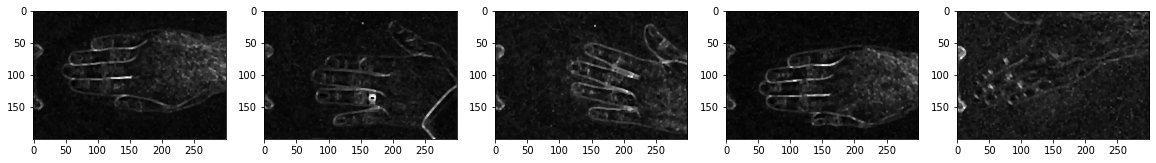

In [ ]:
"""Observemos como quedaron las imagenes despues del filtro"""
paper_path_out = os.path.join(path_out,'paper')
paper_img_out = os.listdir(paper_path_out)

"""Mostramos las primeras 5 imagenes de cada carpeta"""
"""Paper"""
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(paper_img_out[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(paper_path_out, img_path))
    plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
img.shape

(200, 300)

In [ ]:
# Aplicamos función a 'rock'
filtro_laplaceano("rock",i=2,j=1)

In [ ]:
"""Observemos como quedaron las imágenes despues del filtro"""
rock_path_out = os.path.join(path_out,'rock')
rock_img_out = os.listdir(rock_path_out)

"""Mostramos las primeras 5 imágenes de cada carpeta"""
"""Rock"""
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(rock_img_out[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(rock_path_out, img_path))
    plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
# Aplicamos función a 'scissors'
filtro_laplaceano("scissors",i=2,j=1)

In [ ]:
"""Observemos como quedaron las imágenes despues del filtro"""
scissors_path_out = os.path.join(path_out,'scissors')
scissors_img_out = os.listdir(scissors_path_out)

"""Mostramos las primeras 5 imágenes de cada carpeta"""
"""Scissors"""
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(scissors_img_out[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(scissors_path_out, img_path))
    plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
#Obervamos la cantidad de imágenes que tenemos por categoría

paper=len(paper_img_out)
rock=len(rock_img_out)
scissors=len(scissors_img_out)

f"Cantidad de paper: {paper}, Cantidad de rock: {rock}, Cantidad de scissors: {scissors}"

'Cantidad de paper: 712, Cantidad de rock: 726, Cantidad de scissors: 768'


### Separación de los datos 


Particionamos los datos en conjunto train y de validación

In [ ]:
path_out = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive/Filtro_Laplaceano"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_shape =(200,200,1) #Cambiamos la dimension de color dado que se usaran imagenes en blanco y negro

data_generator = ImageDataGenerator(validation_split=0.3,rescale=1/255) 
#No realizamos ningun tratamiento de aumento de datos, solo dividimos el conjunto de datos en 30% validacion y 70% entrenamiento

generate_train = data_generator.flow_from_directory(path_out, target_size=image_shape[:2], subset='training', color_mode = "grayscale")

generate_validation = data_generator.flow_from_directory(path_out, target_size=image_shape[:2], subset='validation', color_mode = "grayscale")

Found 1546 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


### =======================================================================
### ======================== Construcción de la Red =========================
### =======================================================================
#### 2.- Defina una arquitectura basada en redes neuronales convolucionales con el uso de Tensorflow. El diseño debe considerar un mínimo de 8 capas ocultas con al menos una capa convolucional, una capa pooling y una capa fully connected. **(5pts)**

In [ ]:
#Importamos librerias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=image_shape, activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=1))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA FLATTEN (Aplanado de imágenes)
model.add(Flatten())

# CAPA OCULTA DENSA
model.add(Dense(256, activation='relu'))

# CAPA DE SALIDA (3 clases posibles)
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Sacamos el summary del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 128)      0

### =======================================================================
### ======================== Obteniendo el mejor modelo ========================
### =======================================================================

#### 3.- Entrene, optimice y evalúe de forma iterativa hasta hallar una arquitectura con resultados aceptables. Utilizando el modelo final, diagnostique si el modelo tiene problemas de sobreajuste, subajuste, ambas o ninguna. **(5pts)**

In [ ]:
from datetime import datetime

In [ ]:
# Generamos clases para cada categoría
generate_train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
%%time
model.fit(generate_train, epochs=50, validation_data=generate_validation,verbose=1)

In [ ]:
# Persistencia de modelo
# Guardamos el modelo 
model.save(path_out+"/modelo1.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses[['accuracy','val_accuracy']].plot();

Podemos observar que el modelo actual sufre de sobre ajuste principalmente dado que el accuracy inicial del modelo es bueno. Pero se esta aprendiendo de memoria los pasos

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=image_shape, activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA FLATTEN (Aplanado de imágenes)
model.add(Flatten())

# CAPA OCULTA DENSA
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# CAPA DE SALIDA (3 clases posibles)
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
%%time
model.fit(generate_train, epochs=50, validation_data=generate_validation,verbose=1,callbacks=[early_stop])

Epoch 1/50
49/49 [==============================] - 9s 173ms/step - loss: 0.8020 - accuracy: 0.6313 - val_loss: 0.5747 - val_accuracy: 0.7742
Epoch 2/50
49/49 [==============================] - 8s 168ms/step - loss: 0.4438 - accuracy: 0.8338 - val_loss: 0.4181 - val_accuracy: 0.8439
Epoch 3/50
49/49 [==============================] - 8s 170ms/step - loss: 0.3182 - accuracy: 0.8887 - val_loss: 0.3810 - val_accuracy: 0.8485
Epoch 4/50
49/49 [==============================] - 8s 175ms/step - loss: 0.2389 - accuracy: 0.9179 - val_loss: 0.2610 - val_accuracy: 0.9091
Epoch 5/50
49/49 [==============================] - 9s 180ms/step - loss: 0.1631 - accuracy: 0.9463 - val_loss: 0.2262 - val_accuracy: 0.9258
Epoch 6/50
49/49 [==============================] - 8s 171ms/step - loss: 0.1203 - accuracy: 0.9631 - val_loss: 0.2364 - val_accuracy: 0.9167
Epoch 7/50
49/49 [==============================] - 9s 182ms/step - loss: 0.0968 - accuracy: 0.9677 - val_loss: 0.2701 - val_accuracy: 0.9076
Epoch 

In [ ]:
# Persistencia de modelo
model.save(path_out+"/modelo2.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

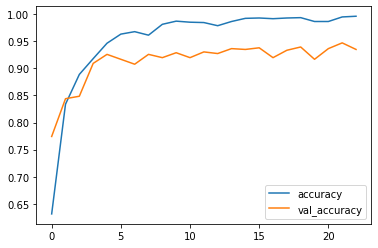

In [ ]:
losses[['accuracy','val_accuracy']].plot();

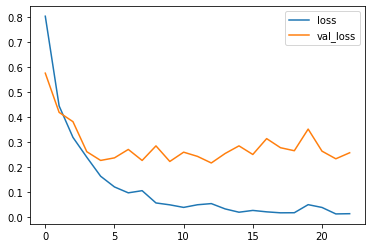

In [ ]:
losses[['loss','val_loss']].plot();

Podemos observar que sigue teniendo sobre ajuste, por lo cual procederemos a ser menos tolerantes en el early stopping.

In [ ]:
model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=image_shape, activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA FLATTEN (Aplanado de imágenes)
model.add(Flatten())

# CAPA OCULTA DENSA
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# CAPA DE SALIDA (3 clases posibles)
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
%%time
model.fit(generate_train, epochs=50, validation_data=generate_validation,verbose=1,callbacks=[early_stop])

Epoch 1/50
49/49 [==============================] - 10s 174ms/step - loss: 0.7474 - accuracy: 0.6527 - val_loss: 0.5479 - val_accuracy: 0.8258
Epoch 2/50
49/49 [==============================] - 9s 174ms/step - loss: 0.4672 - accuracy: 0.8169 - val_loss: 0.5825 - val_accuracy: 0.7621
Epoch 3/50
49/49 [==============================] - 8s 171ms/step - loss: 0.3568 - accuracy: 0.8603 - val_loss: 0.3378 - val_accuracy: 0.8773
Epoch 4/50
49/49 [==============================] - 8s 173ms/step - loss: 0.2151 - accuracy: 0.9237 - val_loss: 0.2767 - val_accuracy: 0.8985
Epoch 5/50
49/49 [==============================] - 9s 173ms/step - loss: 0.1650 - accuracy: 0.9405 - val_loss: 0.3499 - val_accuracy: 0.8561
Epoch 6/50
49/49 [==============================] - 9s 173ms/step - loss: 0.1250 - accuracy: 0.9567 - val_loss: 0.3326 - val_accuracy: 0.9030
Epoch 7/50
49/49 [==============================] - 9s 173ms/step - loss: 0.0999 - accuracy: 0.9664 - val_loss: 0.2707 - val_accuracy: 0.9121
Epoch

In [ ]:
# Persistencia de modelo
model.save(path_out+"/modelo3.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

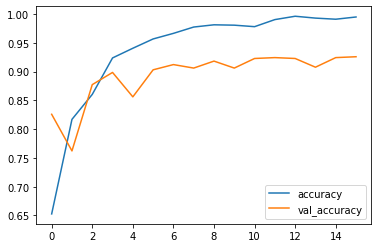

In [ ]:
losses[['accuracy','val_accuracy']].plot();

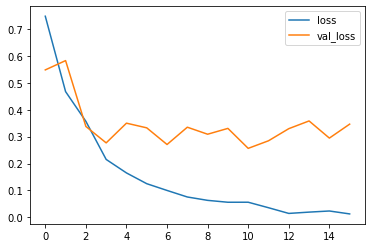

In [ ]:
losses[['loss','val_loss']].plot();

Sin embargo, se mantiene el mismo problema, por lo cual procederemos nuevamente a ser menos tolerantes en el early stopping.

In [ ]:
model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=image_shape, activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=1))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

# CAPA FLATTEN (Aplanado de imágenes)
model.add(Flatten())

# CAPA OCULTA DENSA
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# CAPA DE SALIDA (3 clases posibles)
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [ ]:
%%time
model.fit(generate_train, epochs=50, validation_data=generate_validation,verbose=1,callbacks=[early_stop])

Epoch 1/50
49/49 [==============================] - 10s 193ms/step - loss: 0.7595 - accuracy: 0.6449 - val_loss: 0.5241 - val_accuracy: 0.8015
Epoch 2/50
49/49 [==============================] - 8s 172ms/step - loss: 0.4695 - accuracy: 0.8195 - val_loss: 0.4529 - val_accuracy: 0.8318
Epoch 3/50
49/49 [==============================] - 8s 172ms/step - loss: 0.3418 - accuracy: 0.8765 - val_loss: 0.3143 - val_accuracy: 0.8848
Epoch 4/50
49/49 [==============================] - 8s 172ms/step - loss: 0.2396 - accuracy: 0.9153 - val_loss: 0.3013 - val_accuracy: 0.8848
Epoch 5/50
49/49 [==============================] - 8s 172ms/step - loss: 0.1611 - accuracy: 0.9463 - val_loss: 0.2272 - val_accuracy: 0.9197
Epoch 6/50
49/49 [==============================] - 8s 171ms/step - loss: 0.1505 - accuracy: 0.9411 - val_loss: 0.2262 - val_accuracy: 0.9242
Epoch 7/50
49/49 [==============================] - 8s 171ms/step - loss: 0.0956 - accuracy: 0.9618 - val_loss: 0.2510 - val_accuracy: 0.9242
Epoch

In [ ]:
# Persistencia de modelo
model.save(path_out+"/modelo4.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

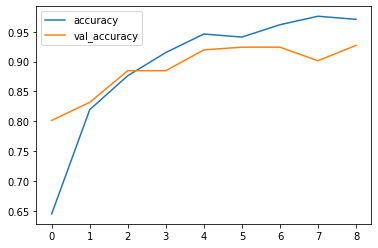

In [ ]:
losses[['accuracy','val_accuracy']].plot();

In [ ]:
losses[['loss','val_loss']].plot();

Podemos ver que se obtuvo un modelo con buen accuracy, aunque mantiene algo de sobreajuste pero es nuestro modelo ganador.

In [ ]:
model.predict(generate_validation)

array([[2.6560882e-11, 1.0000000e+00, 1.1587874e-13],
       [1.0000000e+00, 1.1799393e-10, 2.8103557e-09],
       [1.0000000e+00, 9.2412586e-16, 7.0186620e-14],
       ...,
       [9.0205796e-02, 8.6453080e-01, 4.5263387e-02],
       [3.6137549e-09, 1.0000000e+00, 7.3992071e-12],
       [3.1674062e-03, 4.9695756e-02, 9.4713682e-01]], dtype=float32)

In [ ]:
generate_validation.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
predictions = model.predict(generate_validation)
predictions = np.argmax(predictions, axis=1)
predictions

array([1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0,
       2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0,
       1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1,
       1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(generate_validation.classes, predictions))

              precision    recall  f1-score   support

           0       0.39      0.38      0.38       213
           1       0.39      0.39      0.39       217
           2       0.42      0.43      0.43       230

    accuracy                           0.40       660
   macro avg       0.40      0.40      0.40       660
weighted avg       0.40      0.40      0.40       660



In [ ]:
confusion_matrix(generate_validation.classes, predictions)

array([[ 80,  62,  71],
       [ 66,  85,  66],
       [ 60,  70, 100]])

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(generate_validation.classes, predictions), annot=True, cmap="Blues", fmt=".3g");

### =======================================================================
### ========================= Calculo de dimensiones ==========================
### =======================================================================


#### 4.- Realice los cálculos necesarios para obtener la cantidad de paramétros devueltos por el método `.summary()` para su diseño de arquitectura así como las dimensiones del tensor en cada capa. Los cálculos realizados deben ser detallados. **(10pts)**

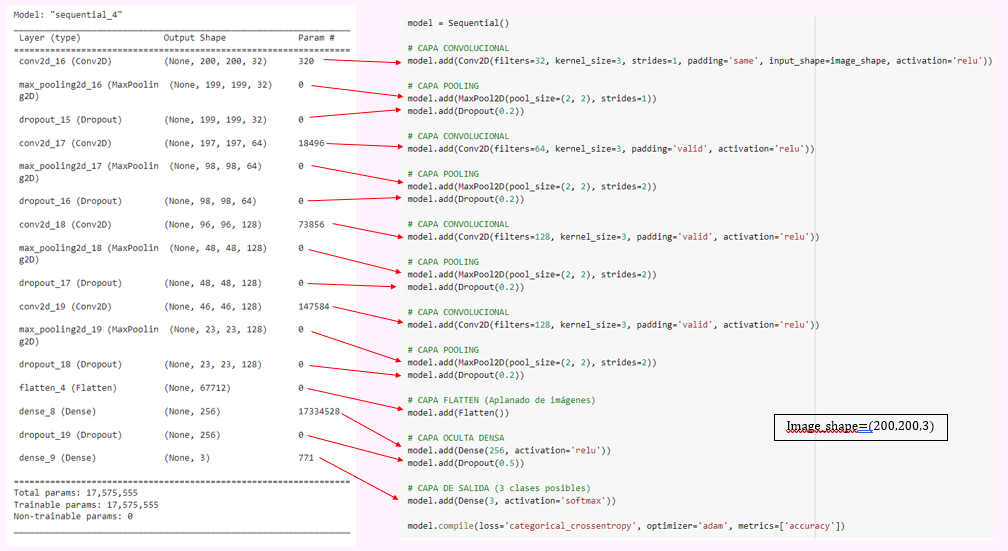

 **1-`CONV2D_16`**

La dimensión de entrada considerada es de 200X200 y el número de parámetros está dado por:

> *   Núm. de filtros = 32
> *   Imagen en escala de grises = 1
> *   Tamaño del Kernel = 3x3


Multiplicamos la imagen en escala de gries por el tamaño del kernel

=> (1)(3)(3) = 9

Tomamos el resultado anterior y lo multiplicamos por el número de filtros

=>    (9)(32) = 288

Sumamos el sesgo

=>     288 + 32 (sesgo)
       = 320


**2-`MAX POOLING_16`**

Usamos la formula 

> *   n ^[l-1] = 200
> *   p = 0
> *   f = 2
> *   s = 1

=>  Tenemos [(200+0-2)/1]+1=199

Y se pasan los 32 filtros

**3-`DROPOUT_15`**

Se duplica la capa de arriba porque solo estamos apagando el 20% de las neuronas.

**4-`CONV2D_17`**

> *   Núm. de filtros = 64
> *   Imagen en escala de grises = 1
> *   Tamaño del Kernel = 3x3

Multiplicamos la imagen en escala de gries por el tamaño del kernel

 => (1)(3)(3) = 9

Tomamos el resultado anterior y lo multiplicamos por el número de filtros

 => (9)(64) = 576

Multiplicamos el resultado por los filtros de la capa anterior

 => (576)(32) [filtros de capa anterior] = 18,432

Sumamo el sesgo

 =>  18,432 + 64 (sesgo) = 18,496

**5-`MAX POOLING_17`**

Por la configuración del filtro se divide 

=> 197/2 = 98.5 

y se toma la función piso, entonces queda 98 y se conservan los 64 filtros

**6-`DROPOUT_16`**

Se duplica la capa de arriba porque solo estamos apagando el 20% de las neuronas.

**7-`CONV2D_18`**

> *   Núm. de filtros = 128
> *   Imagen en escala de grises = 1
> *   Tamaño del Kernel = 3x3

Multiplicamos la imagen en escala de gries por el tamaño del kernel

  => (1)(3)(3) = 9

Tomamos el resultado anterior y lo multiplicamos por el número de filtros

  => (9)(128) = 1,152

Multiplicamos el resultado por los filtros de la capa anterior

  => (1,152)(64)[filtros de capa anterior] = 73,728

Sumamos el sesgo

  => 73,728 + 128(sesgo) = 73,856

**8-`MAX POOLING_18`**

Por la configuración del filtro se divide 

=> 96/2 = 48 

y se conservan los 128 filtros.

**9-`DROPOUT_17`**

Se duplica la capa de arriba porque solo estamos apagando el 20% de las neuronas.

**10-`CONV2D_19`**

> *   Núm. de filtros = 128
> *   Imagen en escala de grises = 1
> *   Tamaño del Kernel = 3x3


Multiplicamos la imagen en escala de gries por el tamaño del kernel

  => (1)(3)(3) = 9

  Tomamos el resultado anterior y lo multiplicamos por el número de filtros

  => (9)(128) = 1,152

  Multiplicamos el resultado por los filtros de la capa anterior

  => (1,152)(128)[filtros de capa anterior] = 147,456

Sumamos el sesgo

  => 147,456 + 128(sesgo) = 147,584

**11-`MAX POOLING_19`**

Por la configuración del filtro se divide 

=> 46/2 = 23 

y se conservan los 128 filtros.

**12-`DROPOUT_18`**

Se duplica la capa de arriba porque solo estamos apagando el 20% de las neuronas.

**13-`FLATTEN_4`**

Sale de la capa de arriba:

=> (23)(23)(128) = 67,712

**14-`DENSE_8`**

Sale ocpando la capa anterior

=> [(256)(67,712)] + 256(sesgo) = 17,334,528


**15-`DROPOUT_19`**

Se duplica la capa de arriba porque solo estamos apagando el 20% de las neuronas.

**16-`Dense_1`**

Sale ocupando la capa anterior

=> [(3)(256)] + 3 = 771


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 200, 200, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 199, 199, 32)     0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 199, 199, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 98, 98, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 98, 98, 64)       

### =======================================================================
### ======================== Aumentación de Datos =========================
### =======================================================================

#### 5.- Seleccione y aplique 5 técnicas de aumentación de datos y reentrene el modelo (independientemente del diagnóstico obtenido). Evalúe el nuevo desempeño tras aplicar estas técnicas y explique los resultados obtenidos (ya sea que se obtenga una mejora o una degradación en el rendimiento). (5pts)

Se usará el dataset con el filtro de detección de bordes

In [ ]:
path_out = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive/Filtro_Laplaceano"

from keras.preprocessing.image import ImageDataGenerator

image_shape =(200,200,1) #Cambiamos la dimension de color dado que se usaran imagenes en blanco y negro

data_generator = ImageDataGenerator(validation_split=0.3, #Separamos el dataset en 70% entrenamiento y 30% de validacion
                                     rotation_range=20, #1era modificación para rotar las imagenes a cierto angulo
                                     width_shift_range=0.10, #2da modificacion para modificar el desplazamiento sobre el ancho de la imagen
                                     height_shift_range=0.10, #3ra modificacion para modificar el desplazamiento sobre el alto de la imagen
                                     rescale=1/255, #Estandarizamos los pixeles
                                     shear_range=0.1, #4ta modificación que modifica el corte de la imagen
                                     horizontal_flip=True) #5ta modificacion activamos el volteo horizontal

generate_train = data_generator.flow_from_directory(path_out, target_size=image_shape[:2], subset='training', color_mode = "grayscale")

generate_validation = data_generator.flow_from_directory(path_out, target_size=image_shape[:2], subset='validation', color_mode = "grayscale")

Found 1546 images belonging to 3 classes.
Found 660 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
"""Creamos la primer red sin otras tecnicas para sobre ajuste""" 

model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=image_shape, activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=1))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=128, kernel_size=3, padding='valid', activation='relu'))

# CAPA POOLING
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# CAPA FLATTEN (Aplanado de imágenes)
model.add(Flatten())

# CAPA OCULTA DENSA
model.add(Dense(256, activation='relu'))

# CAPA DE SALIDA (3 clases posibles)
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from datetime import datetime

In [ ]:
%%time
model.fit(generate_train, epochs=50, validation_data=generate_validation,verbose=1)

Epoch 1/50
49/49 [==============================] - 17s 334ms/step - loss: 0.9139 - accuracy: 0.5440 - val_loss: 0.6926 - val_accuracy: 0.6818
Epoch 2/50
49/49 [==============================] - 15s 304ms/step - loss: 0.6302 - accuracy: 0.7096 - val_loss: 0.5314 - val_accuracy: 0.7909
Epoch 3/50
49/49 [==============================] - 15s 303ms/step - loss: 0.5126 - accuracy: 0.7898 - val_loss: 0.4009 - val_accuracy: 0.8530
Epoch 4/50
49/49 [==============================] - 15s 305ms/step - loss: 0.3691 - accuracy: 0.8687 - val_loss: 0.3476 - val_accuracy: 0.8742
Epoch 5/50
49/49 [==============================] - 15s 308ms/step - loss: 0.3232 - accuracy: 0.8926 - val_loss: 0.2407 - val_accuracy: 0.9182
Epoch 6/50
49/49 [==============================] - 16s 326ms/step - loss: 0.2845 - accuracy: 0.8991 - val_loss: 0.2824 - val_accuracy: 0.8924
Epoch 7/50
49/49 [==============================] - 15s 306ms/step - loss: 0.2558 - accuracy: 0.9075 - val_loss: 0.2088 - val_accuracy: 0.9212

In [ ]:
# Persistencia de modelo
model.save(path_out+"/modeloAumentado1.h5")

In [ ]:
losses = pd.DataFrame(model.history.history)

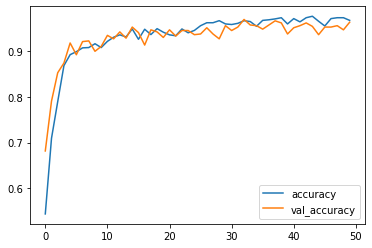

In [ ]:
losses[['accuracy','val_accuracy']].plot();

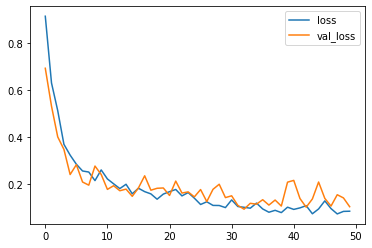

In [ ]:
losses[['loss','val_loss']].plot();

Podemos ver que el modelo se comporta de mejor manera que sin aumentación de datos, arrojandonos un mejor accuracy y podemos apreciar que ya no sufre de sobre ajuste, algo que anteriormente no pudimos eliminar al 100%

In [ ]:
predictions = model.predict(generate_validation)
predictions = np.argmax(predictions, axis=1)
predictions

array([1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0,
       1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0,
       2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1,
       1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1,
       2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2,
       0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1,
       2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2,
       0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(generate_validation.classes, predictions))

              precision    recall  f1-score   support

           0       0.33      0.34      0.33       213
           1       0.32      0.32      0.32       217
           2       0.34      0.33      0.34       230

    accuracy                           0.33       660
   macro avg       0.33      0.33      0.33       660
weighted avg       0.33      0.33      0.33       660



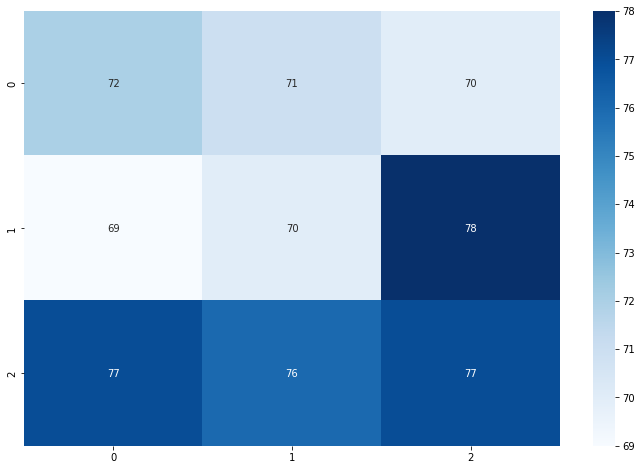

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(generate_validation.classes, predictions), annot=True, cmap="Blues", fmt=".3g");

In [ ]:
generate_train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### =======================================================================
### ======================== Pronostico de imagenes ==========================
### =======================================================================


#### 6.- Cargue 10 imágenes no pertenecientes al conjuntos de datos original (descargadas de internet o fotografías de sus propias manos) y aplique el modelo para obtener su clasificación. Observe los resultados obtenidos y enliste al menos 3 conclusiones. **(5pts)**

Se tienen un total de 15 imagenes nuevas a color, primero se realizará el preprocesamiento de las imagenes aplicando el filtro laplaceano

In [ ]:
# filtro Laplaciano (detección de bordes)
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

In [ ]:
path= "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive/Pruebas/Original"
path_out = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive/Pruebas/Filtrado"

def filtro_laplaceano(i,j):
  for image_filename in os.listdir(path):
      img = cv2.imread(os.path.join(path, image_filename))
      image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Pasamos la imagen a escala de grises
      opencvOutput = cv2.filter2D(src=image, ddepth=-1, kernel=laplacian) #Hacemos el filtro laplaceano
      structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) #Creamos un elemento estructurante para hacer la dilatacion y la erosion
      img_dilate = cv2.dilate(opencvOutput, structuring_element, iterations=i) #Hacemos la dilatacion de la imagen
      img_erode = cv2.erode(img_dilate, structuring_element, iterations=j) #Hacemos la erosion
      cv2.imwrite(os.path.join(path_out, image_filename),img_erode) #Guardamos la nueva imagen

In [ ]:
filtro_laplaceano(i=5,j=1)

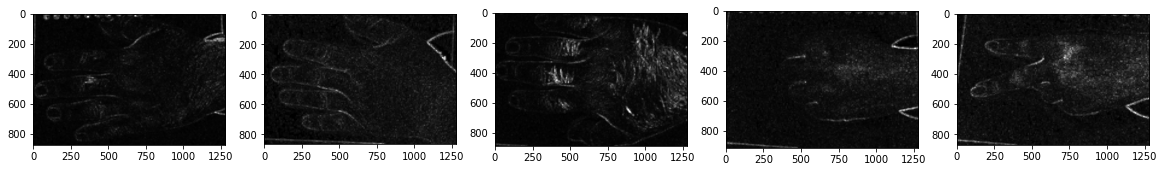

In [ ]:
"""Mostramos las primeras 5 imagenes"""
"""Observemos como quedaron las imagenes despues del filtro"""
img_out = os.listdir(path_out)
"""Mostramos las primeras 5 imagenes"""
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(img_out[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(path_out, img_path))
    plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
"""Importamos el modelo ganador que fue con aumentación de datos"""

from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica1/archive/Filtro_Laplaceano/modeloAumentado1.h5")

Paper


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


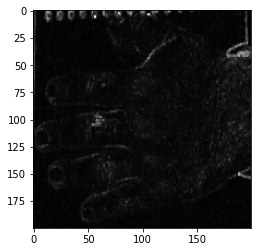

Paper


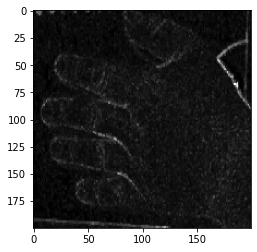

Paper


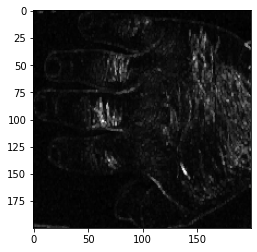

Paper


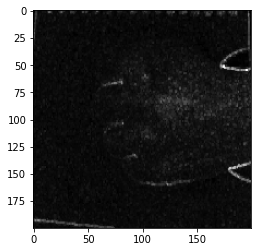

Paper


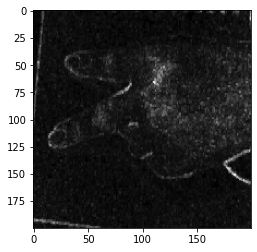

Paper


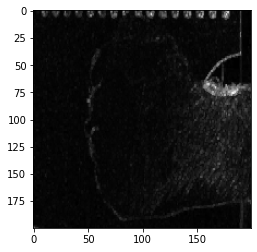

Paper


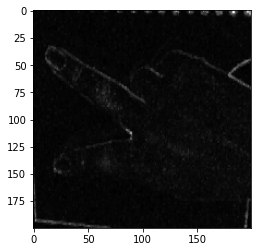

Paper


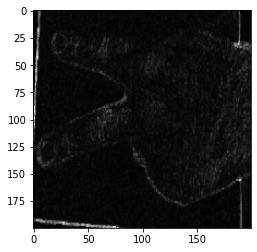

Paper


Rock


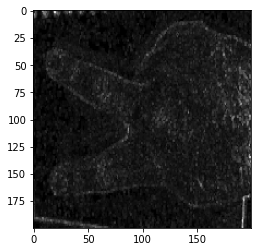

Paper


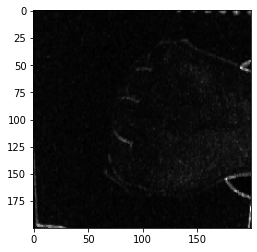

Rock


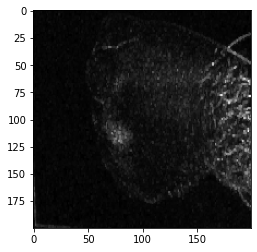

Rock


Paper


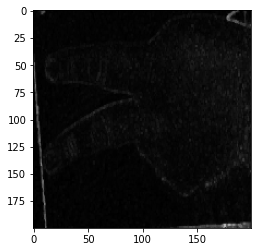

Paper


In [ ]:
from keras.preprocessing import image
resultado = []

for i in range(len(img_out)):
  uploaded = os.path.join(path_out,img_out[i])
  img = image.load_img(uploaded, target_size = (200, 200), grayscale=True)
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)  

  if classes[0, 0] == 1:
    print('Paper')
    resultado.append("Paper")
  elif classes[0, 1] == 1:
    print('Rock')
    resultado.append("Rock")
  else:
    print('Scissors')
    resultado.append("Scissors")

  imgplot = plt.imshow(img,cmap="gray")
  plt.show()

A continuacion mostraremos las imagenes a color

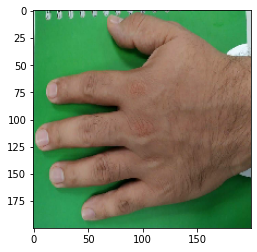

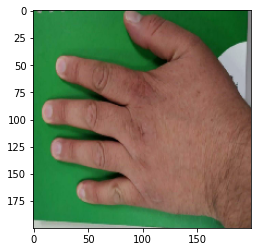

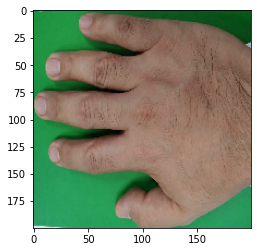

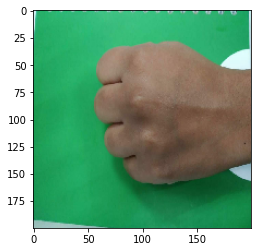

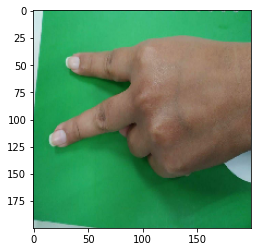

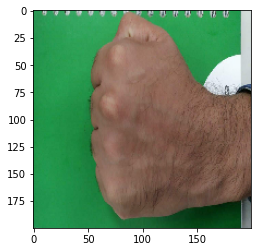

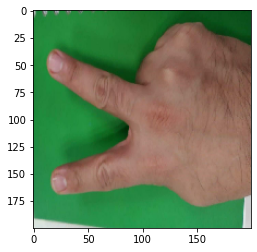

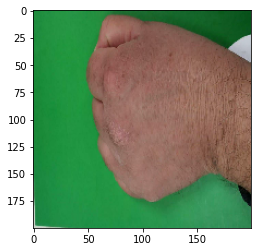

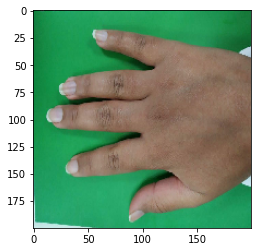

In [ ]:
img_inp = img_out = os.listdir(path)
for i in range(len(img_inp)):
  uploaded = os.path.join(path,img_inp[i])
  img = image.load_img(uploaded, target_size = (200, 200), grayscale=False)
  imgplot = plt.imshow(img,cmap="gray")
  plt.show()

Podemos apreciar que en las imagenes reales:

* 1.- Paper
* 2.- Paper
* 3.- Paper
* 4.- Rock
* 5.- Scissors
* 6.- Rock
* 7.- Scissors
* 8.- Scissors
* 9.- Paper
* 10.- Scissors
* 11.- Rock
* 12.- Rock
* 13.- Rock
* 14.- Scissors
* 15.- Paper

In [ ]:
"""Resultados Modelo"""
for i in range(len(resultado)):
  print(str(i+1)+": "+str(resultado[i]))

1: Paper
2: Paper
3: Paper
4: Paper
5: Paper
6: Paper
7: Paper
8: Paper
9: Paper
10: Rock
11: Paper
12: Rock
13: Rock
14: Paper
15: Paper


## Conclusiones

* Podemos apreciar que el modelo batalla para detectar cuando el jugador usa scissors, ademas que sus respuestas tienden mas por seleccionar a paper.

* Es probable que el uso del filtro laplaceano pueda afectar el resultado final del modelo dado que no es capaz de detectar de manera adecuada la forma de la mano que era lo que se esperaba al realizar dicha transformación

* Si bien el modelo tuvo un accuracy alto, es importante probar otra configuración el input de las imagenes para ver si es posible mejorar los distintos scores que salieron bajos para cada una de las 3 clases. Por lo cual podemos concluir que el modelo no es tan bueno como nos imaginamos en un principio y tiene amplio rango de mejora